In [ ]:
from google.colab import files
uploaded = files.upload()

Saving sgemm_product - sgemm_product.csv.csv to sgemm_product - sgemm_product.csv.csv


In [ ]:
import pandas as pd
dataset = pd.read_csv("sgemm_product - sgemm_product.csv.csv")

dataset.head()

,MWG,NWG,KWG,MDIMC,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN,STRM,STRN,SA,SB,Run1 (ms),Run2 (ms),Run3 (ms),Run4 (ms)
0,16,16,16,8,8,8,8,2,1,1,0,0,0,0,115.26,115.87,118.55,115.80
1,16,16,16,8,8,8,8,2,1,1,0,0,0,1,78.13,78.25,79.25,79.19
2,16,16,16,8,8,8,8,2,1,1,0,0,1,0,79.84,80.69,80.76,80.97
3,16,16,16,8,8,8,8,2,1,1,0,0,1,1,84.32,89.90,86.75,85.58
4,16,16,16,8,8,8,8,2,1,1,0,1,0,0,115.13,121.98,122.73,114.81


In [ ]:
dataset.info()
dataset.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241600 entries, 0 to 241599
Data columns (total 18 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   MWG        241600 non-null  int64  
 1   NWG        241600 non-null  int64  
 2   KWG        241600 non-null  int64  
 3   MDIMC      241600 non-null  int64  
 4   NDIMC      241600 non-null  int64  
 5   MDIMA      241600 non-null  int64  
 6   NDIMB      241600 non-null  int64  
 7   KWI        241600 non-null  int64  
 8   VWM        241600 non-null  int64  
 9   VWN        241600 non-null  int64  
 10  STRM       241600 non-null  int64  
 11  STRN       241600 non-null  int64  
 12  SA         241600 non-null  int64  
 13  SB         241600 non-null  int64  
 14  Run1 (ms)  241600 non-null  float64
 15  Run2 (ms)  241600 non-null  float64
 16  Run3 (ms)  241600 non-null  float64
 17  Run4 (ms)  241600 non-null  float64
dtypes: float64(4), int64(14)
memory usage: 33.2 MB


,MWG,NWG,KWG,MDIMC,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN,STRM,STRN,SA,SB,Run1 (ms),Run2 (ms),Run3 (ms),Run4 (ms)
count,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000
mean,80.415364,80.415364,25.513113,13.935894,13.935894,17.371126,17.371126,5.000000,2.448609,2.448609,0.500000,0.500000,0.500000,0.500000,217.647852,217.579536,217.532756,217.527669
std,42.469220,42.469220,7.855619,7.873662,7.873662,9.389418,9.389418,3.000006,1.953759,1.953759,0.500001,0.500001,0.500001,0.500001,369.012422,368.677309,368.655118,368.677413
min,16.000000,16.000000,16.000000,8.000000,8.000000,8.000000,8.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,13.290000,13.250000,13.360000,13.370000
25%,32.000000,32.000000,16.000000,8.000000,8.000000,8.000000,8.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,40.660000,40.710000,40.660000,40.640000
50%,64.000000,64.000000,32.000000,8.000000,8.000000,16.000000,16.000000,5.000000,2.000000,2.000000,0.500000,0.500000,0.500000,0.500000,69.825000,69.930000,69.790000,69.820000
75%,128.000000,128.000000,32.000000,16.000000,16.000000,32.000000,32.000000,8.000000,4.000000,4.000000,1.000000,1.000000,1.000000,1.000000,228.530000,228.310000,228.320000,228.320000
max,128.000000,128.000000,32.000000,32.000000,32.000000,32.000000,32.000000,8.000000,8.000000,8.000000,1.000000,1.000000,1.000000,1.000000,3339.630000,3375.420000,3397.080000,3361.710000


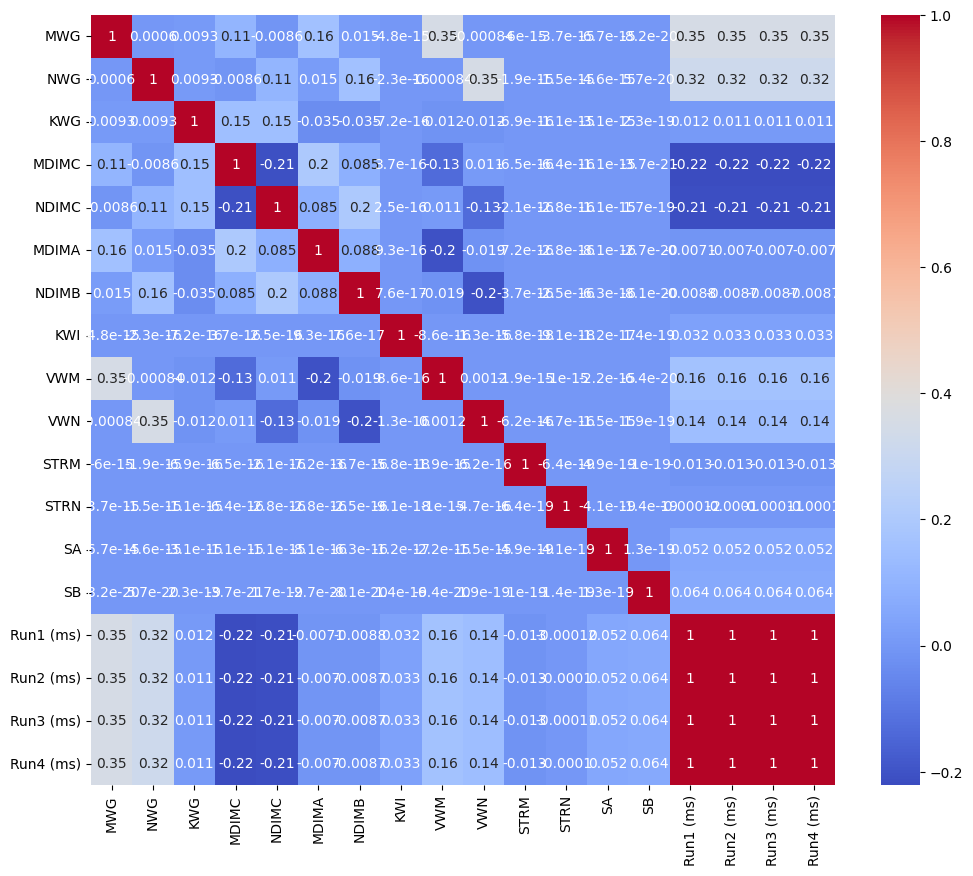

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,10))
sns.heatmap(dataset.corr(), annot=True, cmap="coolwarm")
plt.show()

In [ ]:
x = dataset.iloc[:, :-4]
RuntimeVar = dataset.iloc[:, -4:]
df = pd.DataFrame(dataset)

df['Average Run'] = (df['Run1 (ms)'] + df['Run2 (ms)'] + df['Run3 (ms)'] + df['Run4 (ms)']) / 4

import numpy as np

x=df.drop(['Run1 (ms)','Run2 (ms)','Run3 (ms)', 'Run4 (ms)', 'Average Run'],axis=1)
y=np.log(df['Average Run'])

print (x)
print (y)


        MWG  NWG  KWG  MDIMC  NDIMC  MDIMA  NDIMB  KWI  VWM  VWN  STRM  STRN  \
0        16   16   16      8      8      8      8    2    1    1     0     0   
1        16   16   16      8      8      8      8    2    1    1     0     0   
2        16   16   16      8      8      8      8    2    1    1     0     0   
3        16   16   16      8      8      8      8    2    1    1     0     0   
4        16   16   16      8      8      8      8    2    1    1     0     1   
...     ...  ...  ...    ...    ...    ...    ...  ...  ...  ...   ...   ...   
241595  128  128   32     32     32     32     32    8    4    4     1     0   
241596  128  128   32     32     32     32     32    8    4    4     1     1   
241597  128  128   32     32     32     32     32    8    4    4     1     1   
241598  128  128   32     32     32     32     32    8    4    4     1     1   
241599  128  128   32     32     32     32     32    8    4    4     1     1   

        SA  SB  
0        0   0  
1    

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(random_state=42)
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, KFold

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(regressor, X_train, y_train, cv=kf)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Square Error (RMSE): {rmse}")
print(f"R2 Score: {r2}")

#Cross Validation because I am scared of overfitting
print("Cross-validation scores for each fold: ", cv_scores)
print("Average cross-validation score: ", np.mean(cv_scores))


Mean Absolute Error (MAE): 0.014938390736402692
Root Mean Square Error (RMSE): 0.02777872945617976
R2 Score: 0.9993880220228576
Cross-validation scores for each fold:  [0.9991703  0.99916654 0.99915685 0.99920684 0.99918157]
Average cross-validation score:  0.9991764193011777


In [ ]:
hyper_tune = {
    'n_estimators': [50, 300],
    'max_depth': [5, 50],
    'min_samples_split': [2, 10],
    'min_samples_leaf': [1, 10]
}

#this shit took over an hour then died sos?

#from sklearn.model_selection import GridSearchCV
#grid_search = GridSearchCV(estimator=regressor, param_grid=hyper_tune, cv=3, n_jobs=-1, verbose=2, scoring='neg_mean_absolute_error')
#grid_search.fit(X_train, y_train)

#read about Bayes Search, maybe better than randomised (?)

from sklearn.model_selection import RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=regressor, param_distributions=hyper_tune, cv=3, n_jobs=-1, n_iter=50, random_state=42, scoring='neg_mean_absolute_error')
random_search.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 16 is smaller than n_iter=50. Running 16 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'max_depth': [5, 50],
                                        'min_samples_leaf': [1, 10],
                                        'min_samples_split': [2, 10],
                                        'n_estimators': [50, 300]},
                   random_state=42, scoring='neg_mean_absolute_error')

In [ ]:
best = random_search.best_estimator_
print("Best Parameters are ", random_search.best_params_)
y_pred_best = best.predict(X_test)

Best Parameters are  {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 50}


In [ ]:
mae_best = mean_absolute_error(y_test, y_pred_best)
rmse_best = np.sqrt(mean_squared_error(y_test, y_pred_best))

print(f"Tuned Model Mean Absolute Error (MAE): {mae_best}")
print(f"Tuned Model Root Mean Square Error (RMSE): {rmse_best}")

Tuned Model Mean Absolute Error (MAE): 0.014837599056287397
Tuned Model Root Mean Square Error (RMSE): 0.027602881093270245


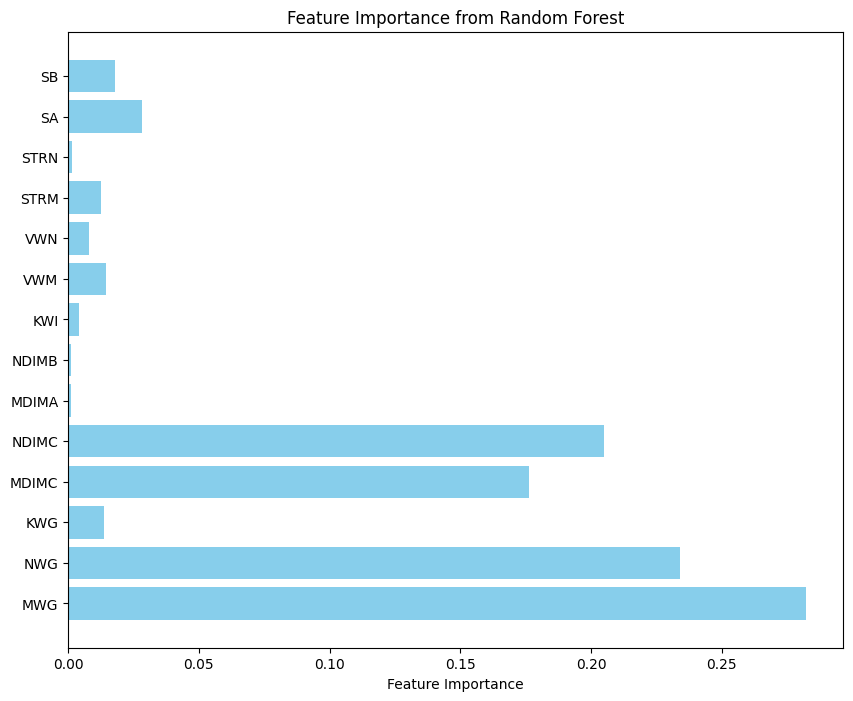

In [ ]:
importances = regressor.feature_importances_
f_names = x.columns

plt.figure(figsize=(10, 8))
plt.barh(f_names, importances, color='skyblue')
plt.xlabel('Feature Importance')
plt.title('Feature Importance from Random Forest')
plt.show()